In [3]:
import os
import sys
import math
import numpy as np
import matplotlib.pylab as plt

import torch
from torch.optim.lr_scheduler import MultiStepLR
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from gradual_warmup_lr_scheduler import GradualWarmupScheduler

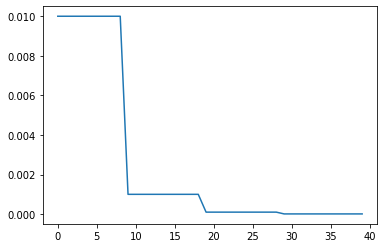

In [4]:
%matplotlib inline

t = torch.tensor([0.0], requires_grad=True)
optim = torch.optim.SGD([t], lr=0.01)
lr_scheduler = MultiStepLR(optim, milestones=[10, 20, 30])

lrs = []
for e in range(40):
    optim.step()
    lr_scheduler.step()
    lrs.append((e, optim.param_groups[0]['lr']))

lrs = np.array(lrs)
plt.plot(lrs[:, 0], lrs[:, 1])

- 1 0.5625 0.75 0.75
- 2 0.08333333333333341 0.2500000000000001 0.2500000000000001
- 3 0.0 0.0 0.0
- 4 0.4999999999999999 0.24999999999999994 0.24999999999999994
- 5 2.2500000000000036 0.7500000000000004 0.7500000000000004
- 6 1.333333333333334 1.0000000000000004 1.0000000000000004
- 7 0.5625000000000006 0.7500000000000006 0.7500000000000006
- 8 0.08333333333333363 0.25000000000000056 0.25000000000000056
- 9 0.0 0.0 0.0
- 10 0.4999999999999999 0.24999999999999994 0.24999999999999994


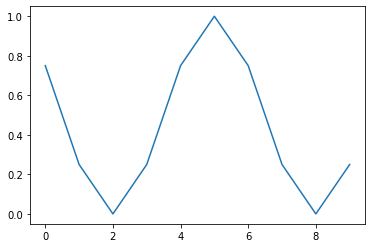

In [11]:
t = torch.tensor([0.0], requires_grad=True)
optim = torch.optim.SGD([t], lr=1.)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, 3)

lrs = []
for e in range(10):
    optim.step()
    lr_scheduler.step()
    lrs.append((e, optim.param_groups[0]['lr']))
#     print(e,optim.param_groups[0]['lr'])
    print("-", lr_scheduler.last_epoch, lr_scheduler.get_lr()[0], lr_scheduler.get_last_lr()[0], optim.param_groups[0]['lr'])

lrs = np.array(lrs)
plt.plot(lrs[:, 0], lrs[:, 1])


0 0.1
1 0.09000000000000001
2 0.08100000000000002
3 0.007290000000000002
4 0.006561000000000002
5 0.005904900000000002
6 0.0005314410000000002
7 0.0004782969000000002
8 0.0004304672100000002
9 3.874204890000002e-05


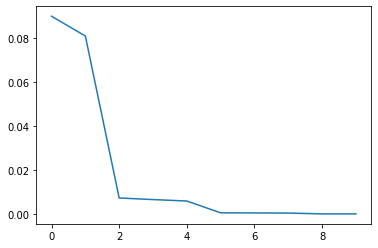

In [17]:
import torch
from torch.optim import SGD
from torch.optim.lr_scheduler import ExponentialLR, StepLR

model = [torch.nn.Parameter(torch.randn(2, 2, requires_grad=True))]
optimizer = SGD(model, 0.1)
scheduler1 = ExponentialLR(optimizer, gamma=0.9)
scheduler2 = StepLR(optimizer, step_size=3, gamma=0.1)
lrs = []
for epoch in range(10):
    print(epoch, scheduler2.get_last_lr()[0])

    optimizer.step()
    scheduler1.step()
    scheduler2.step()
    lrs.append((epoch, scheduler2.get_last_lr()[0]))
lrs = np.array(lrs)
plt.plot(lrs[:, 0], lrs[:, 1])